In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
df = pd.read_csv('/Users/tanish/Downloads/new_model.csv')

In [288]:
df.head()

,BLOOD_pressure,SOECIFIC_GRAVITY,ALBUMIN,SUGAR,RED_BLOOD_CELLS,BLOOD_UREA,SERUM_CREATININE,SODIUM,POTASSSIUM,HEMOGLOBIN,WHITE_BLOOD_CELL_COUNT,RED_BLOOD_CELL_COUNT,HYPERTENSION,age,Class
0,80,1.020,1,0,1,36.0,1.2,137.53,4.63,15.4,7800,5.20,1.0,48.0,1
1,50,1.020,4,0,1,18.0,0.8,137.53,4.63,11.3,6000,4.71,0.0,7.0,1
2,80,1.010,2,3,1,53.0,1.8,137.53,4.63,9.6,7500,4.71,0.0,62.0,1
3,70,1.005,4,0,1,56.0,3.8,111.00,2.50,11.2,6700,3.90,1.0,48.0,1
4,80,1.010,2,0,1,26.0,1.4,137.53,4.63,11.6,7300,4.60,0.0,51.0,1


In [289]:
df.drop('RED_BLOOD_CELL_COUNT', axis=1, inplace=True)

In [290]:
df.isnull().sum()

BLOOD_pressure            0
SOECIFIC_GRAVITY          0
ALBUMIN                   0
SUGAR                     0
RED_BLOOD_CELLS           0
BLOOD_UREA                0
SERUM_CREATININE          0
SODIUM                    0
POTASSSIUM                0
HEMOGLOBIN                0
WHITE_BLOOD_CELL_COUNT    0
HYPERTENSION              0
age                       9
Class                     0
dtype: int64

In [291]:
df.shape

(400, 14)

In [292]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [293]:
df.corr()['Class'].sort_values()[:-1]

HEMOGLOBIN               -0.729537
SOECIFIC_GRAVITY         -0.659504
SODIUM                   -0.342268
RED_BLOOD_CELLS          -0.282642
POTASSSIUM                0.077063
WHITE_BLOOD_CELL_COUNT    0.205266
age                       0.225405
BLOOD_pressure            0.290145
SERUM_CREATININE          0.294076
SUGAR                     0.294555
BLOOD_UREA                0.371982
HYPERTENSION              0.586340
ALBUMIN                   0.598389
Name: Class, dtype: float64

<Axes: xlabel='Class', ylabel='count'>

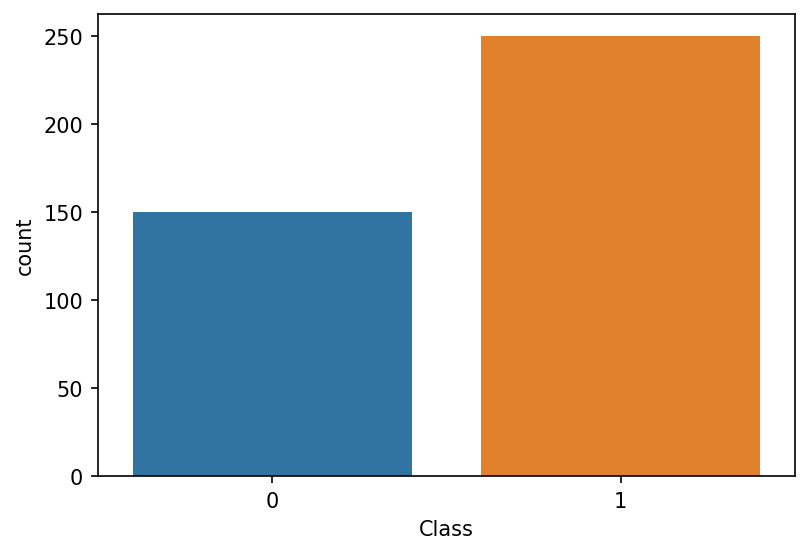

In [294]:
plt.figure(figsize=(6, 4), dpi=150)
sns.countplot(x=df['Class'])

<Axes: xlabel='age', ylabel='Count'>

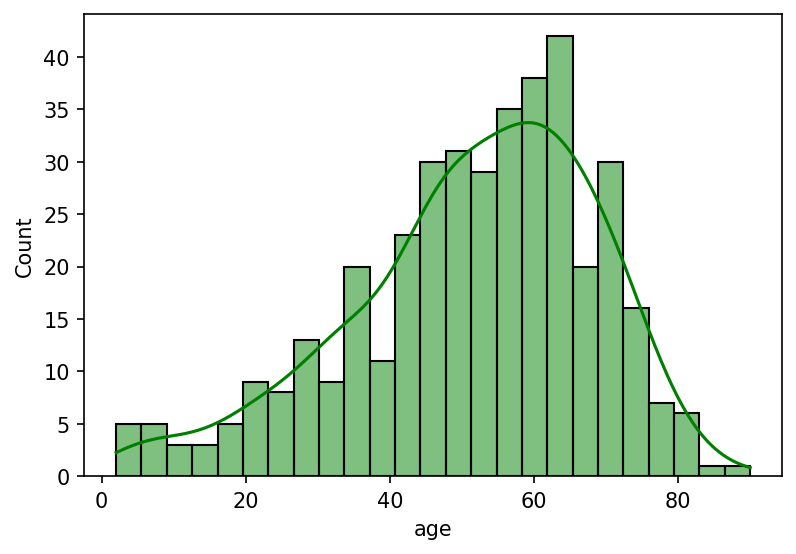

In [295]:
plt.figure(figsize=(6, 4), dpi=150)
sns.histplot(x=df['age'], bins=25, kde=True, color='g')

<Axes: xlabel='ALBUMIN', ylabel='BLOOD_UREA'>

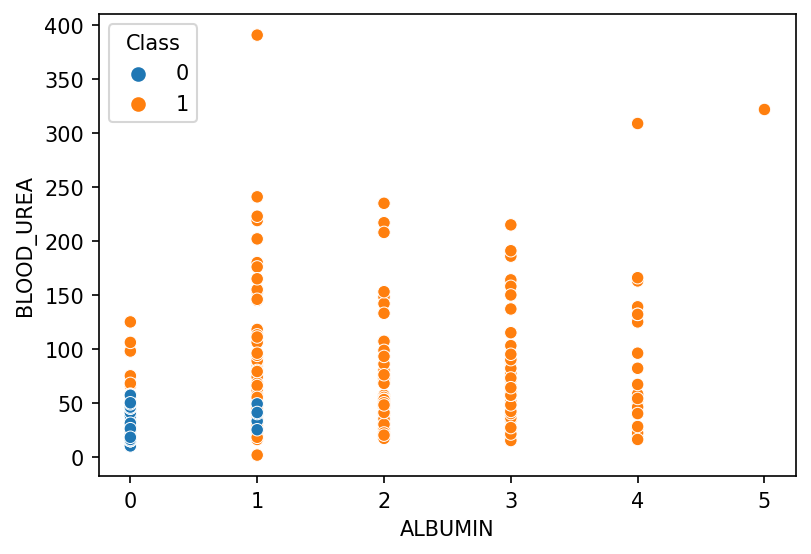

In [296]:
plt.figure(figsize=(6, 4), dpi=150)
sns.scatterplot(x=df['ALBUMIN'], y=df['BLOOD_UREA'], hue=df['Class'])

<Axes: xlabel='BLOOD_pressure', ylabel='SUGAR'>

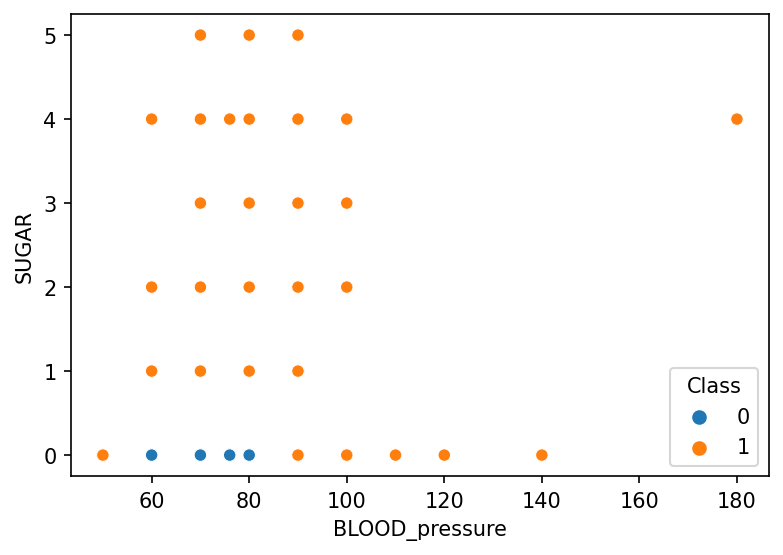

In [297]:
plt.figure(figsize=(6, 4), dpi=150)
sns.scatterplot(x=df['BLOOD_pressure'], y=df['SUGAR'], hue=df['Class'])

In [298]:
X=  df.drop('Class', axis=1)
y = df['Class']

In [299]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [301]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [302]:
#Support Vector
svc = SVC()

param_grid_svm = {'kernel': ['linear', 'rbf', 'poly'],
             'C': [0.01 ,0.1, 1, 10, 100], 
             'degree': [2, 3, 4]}

grid = GridSearchCV(svc, param_grid=param_grid_svm)
grid.fit(scaled_X_train, y_train)
y_pred = grid.predict(scaled_X_test)

In [303]:
accuracy_score(y_test, y_pred)

0.9583333333333334

In [304]:
grid.best_params_

{'C': 0.1, 'degree': 2, 'kernel': 'linear'}

In [305]:
model1 = SVC(C=0.1, degree=2, kernel='linear', probability=True) 

In [306]:
model1.fit(scaled_X_train, y_train)

SVC(C=0.1, degree=2, kernel='linear', probability=True)

In [307]:
y_pred_ = model1.predict(scaled_X_test)
accuracy_score(y_test, y_pred_)

0.9583333333333334

In [308]:
np.abs(model1.coef_)

array([[0.23172277, 0.75931543, 0.55218466, 0.39270835, 0.06880481,
        0.04320187, 0.44382713, 0.24548265, 0.20134577, 0.80644282,
        0.00358445, 0.54159741, 0.05074109]])

In [309]:
df_svm_fea = pd.DataFrame(index=X.columns, data=np.abs(model1.coef_.flatten()), columns=['Feature Importance'])

In [310]:
df_svm_fea = dff.sort_values('Feature Importance')

In [311]:
df_svm_fea

,Feature Importance
WHITE_BLOOD_CELL_COUNT,0.003584
BLOOD_UREA,0.043202
age,0.050741
RED_BLOOD_CELLS,0.068805
POTASSSIUM,0.201346
BLOOD_pressure,0.231723
SODIUM,0.245483
SUGAR,0.392708
SERUM_CREATININE,0.443827
HYPERTENSION,0.541597


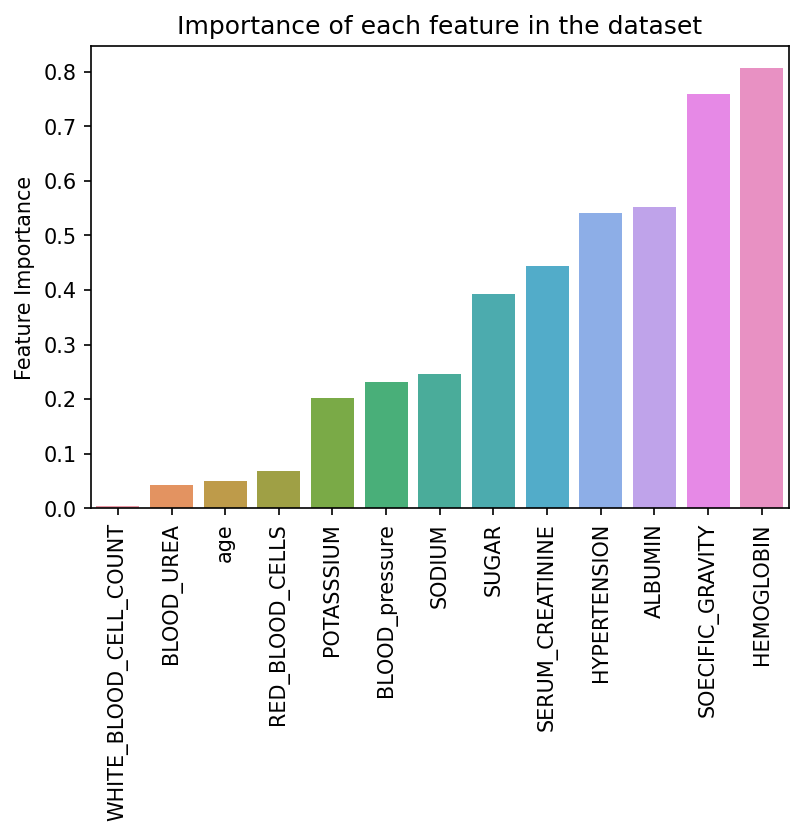

In [312]:
plt.figure(figsize=(6, 4), dpi=150)
sns.barplot(x = df_svm_fea.index, y=df_svm_fea['Feature Importance'])
plt.xticks(rotation=90);
plt.title("Importance of each feature in the dataset");

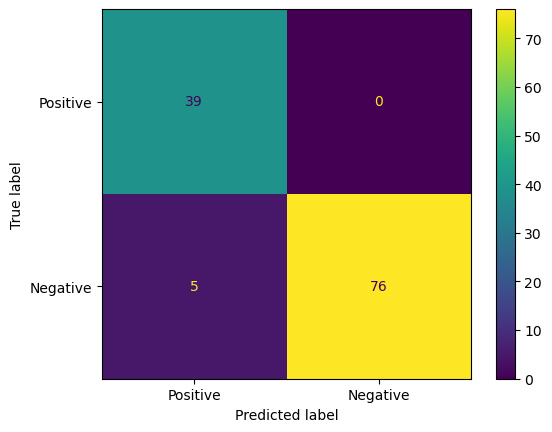

In [313]:
con_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = ["Positive", "Negative"])
cm_display.plot()
plt.show()

In [314]:
#Decision Trees
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_pred_final = model.predict(X_test)

In [315]:
accuracy_score(y_test, y_pred_final)

0.9583333333333334

In [316]:
model.feature_importances_

array([0.        , 0.1254831 , 0.        , 0.        , 0.        ,
       0.        , 0.02749489, 0.        , 0.        , 0.81615885,
       0.        , 0.03086316, 0.        ])

In [317]:
df_imp_feat = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

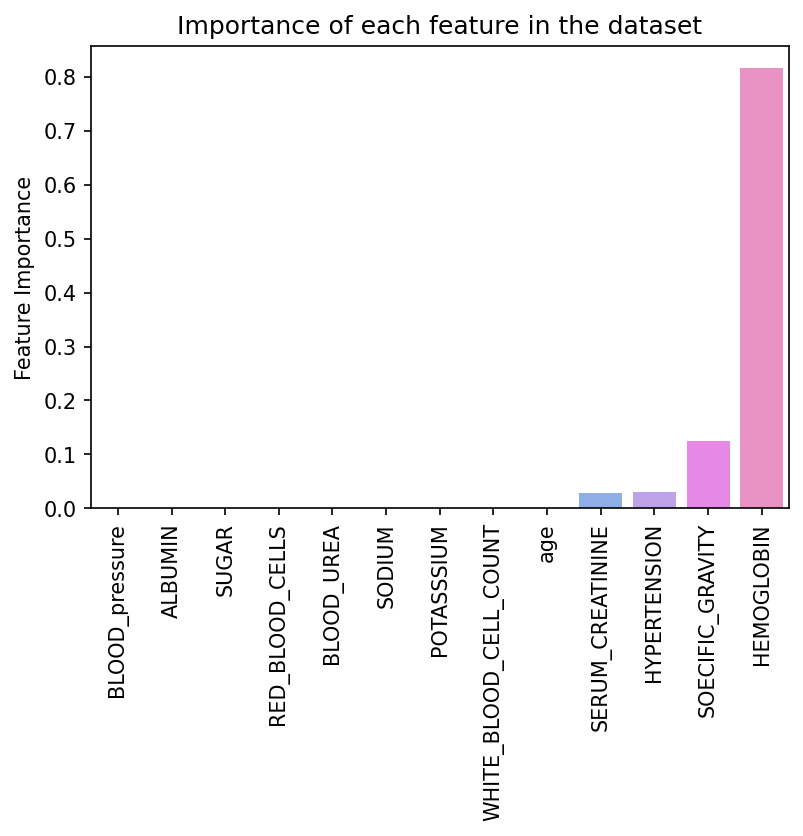

In [318]:
plt.figure(figsize=(6, 4), dpi=150)
sns.barplot(x = df_imp_feat.index, y=df_imp_feat['Feature Importance'])
plt.xticks(rotation=90);
plt.title("Importance of each feature in the dataset");

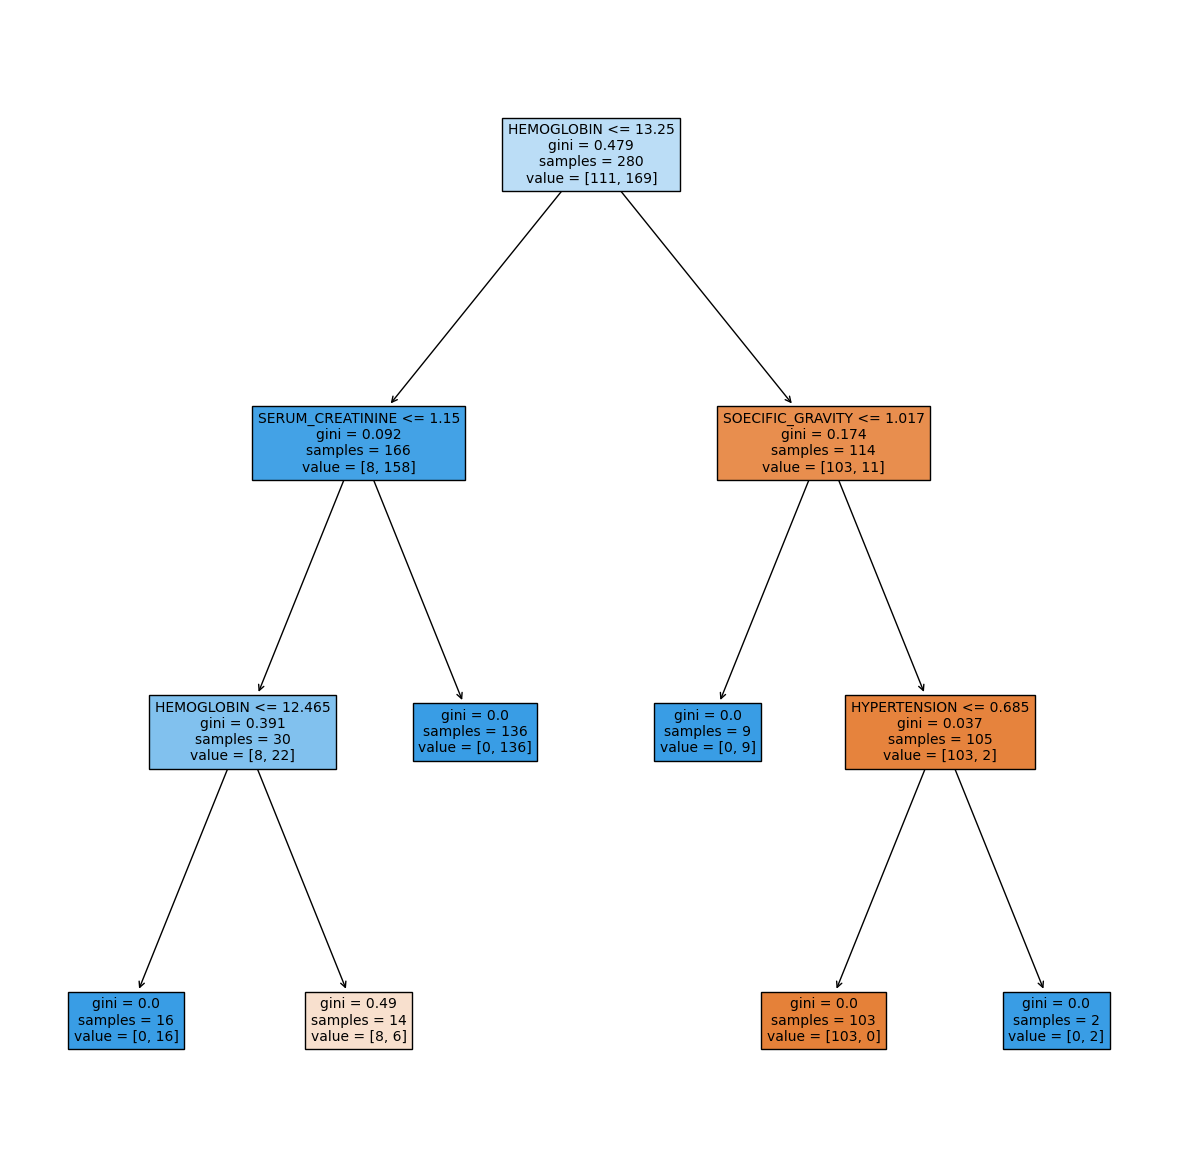

In [319]:
plt.figure(figsize=(15, 15))
plot_tree(model, fontsize=10, filled=True, feature_names=X_train.columns);

In [328]:
m = {}
for i in X.columns:
    m[i] = 0
    
age = float(input("Enter your age: "))
m['age'] = age

sodium = float(input("Enter the Sodium_level: range(4.50-163.0): "))
m['SODIUM'] = sodium

pot = float(input("Enter the Potassium_level: range(2.50-47.0): "))
m['POTASSSIUM'] = pot

SERUM_CREATININE = float(input("Enter the Serum-Creatinine level: range(0.40-76.00): "))
m['SERUM_CREATININE'] = SERUM_CREATININE

blood_urea = float(input("Enter blood urea level: range(1.5-391.0)  "))
m['BLOOD_UREA'] = blood_urea

BLOOD_pressure = int(input("Enter blood-pressure level: range(50-180)  "))
m['BLOOD_pressure'] = BLOOD_pressure

ht = float(input("Enter 1 if you have hypertension else 0:  "))
m['HYPERTENSION'] = ht

sugar = int(input("Enter sugar level range(0-5):  "))
m['SUGAR'] = sugar

alb = float(input("Enter Albumin level: range(0.0-5.0)  "))
m['ALBUMIN'] = alb

hae = float(input("Enter Haemoglobin level: range(3.10-17.80)  "))
m['HEMOGLOBIN'] = hae



predictors = [list(m.values())]
predictors = scaler.transform(predictors)
outcome = model1.predict(predictors)[0]
prob = model1.predict_proba(predictors)[0]

if outcome == 0:
    print("You don't have Kidney Disease: ")
    print(f"Probablity of the outcome is {round(prob[0]*100, 2)}%. ")
else:
    print("You have Kidney Disease: ")
    print(f"Probablity of the outcome is {round(prob[1]*100, 2)}%. ")
    
if outcome == 1 and prob[1] > 0.80:
    print(f"Consult Doctor Immediately: ")



Enter your age: 50
Enter the Sodium_level: range(4.50-163.0): 67
Enter the Potassium_level: range(2.50-47.0): 44
Enter the Serum-Creatinine level: range(0.40-76.00): 67
Enter blood urea level: range(1.5-391.0)  34
Enter blood-pressure level: range(50-180)  133
Enter 1 if you have hypertension else 0:  0
Enter sugar level range(0-5):  4
Enter Albumin level: range(0.0-5.0)  3
Enter Haemoglobin level: range(3.10-17.80)  4.9
You have Kidney Disease: 
Probablity of the outcome is 100.0%. 
Consult Doctor Immediately: 


/Users/tanish/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [329]:
from joblib import dump, load

In [331]:
dump(model1, "Kidney.joblib")

['Kidney.joblib']